#  Logistic Regression:

**Demonstrating the implementation of logistic regression, using the SciKit Learn library to implement Machine Learning algorithms.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

**The data I will be analyzing for logistic regression is the well known Titanic dataset from Kaggle:**

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Finding Missing Data

**It seems that there is Nan data in both the age and cabin columns:**

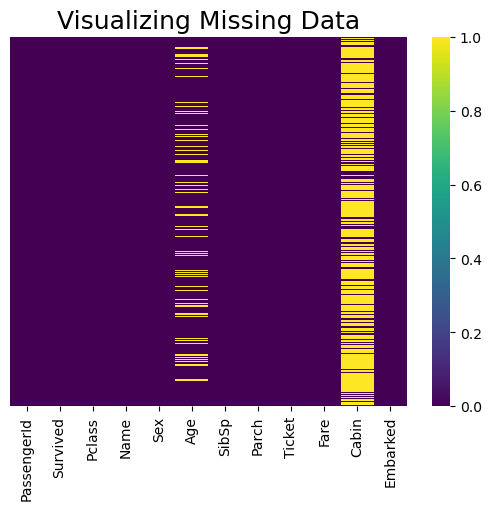

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar= True,cmap='viridis')
plt.title('Visualizing Missing Data', fontsize = 18)
plt.show()

## Visualizing more of the data:

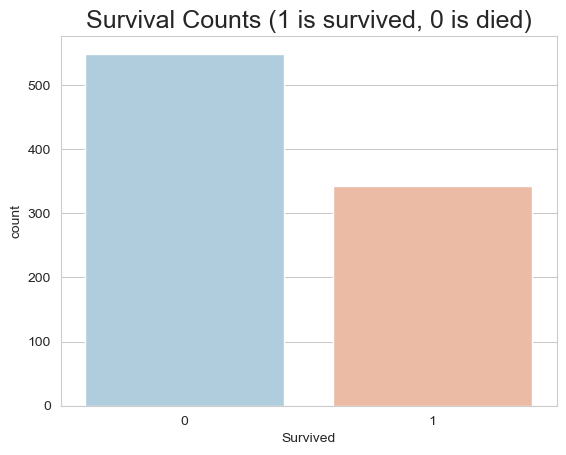

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')
plt.title('Survival Counts (1 is survived, 0 is died)', fontsize = 18)
plt.show()

**Shown above the majority of the passengers did NOT survive.**

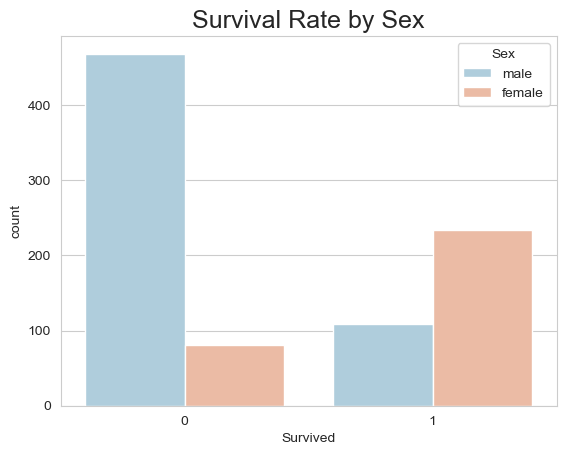

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
plt.title('Survival Rate by Sex', fontsize = 18)
plt.show()

**The majority of the survivors were women.**

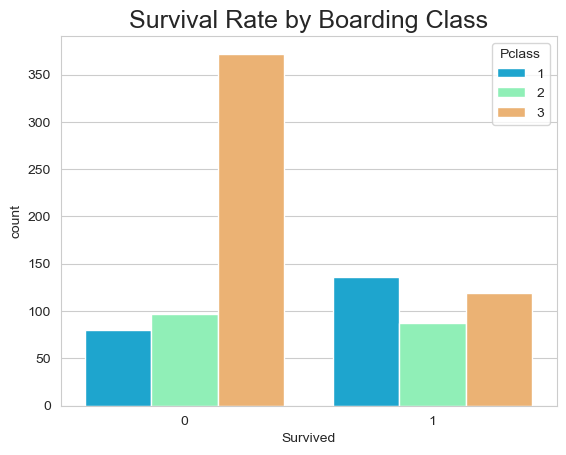

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.title('Survival Rate by Boarding Class', fontsize = 18)
plt.show()

**First class passengers had the most survivors, and third class passnegers had the most deaths.**

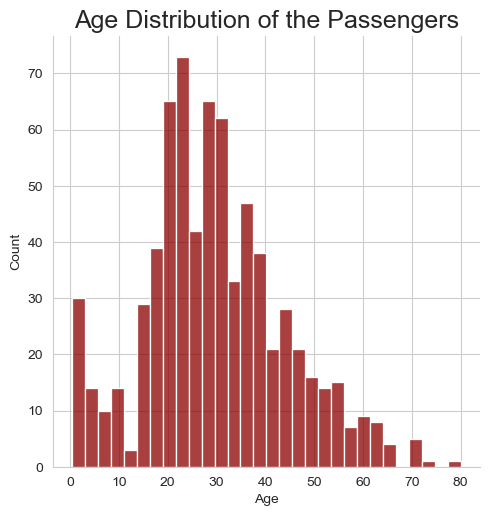

In [8]:
#age distribution without null values:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
plt.title('Age Distribution of the Passengers', fontsize  = 18)
plt.show()

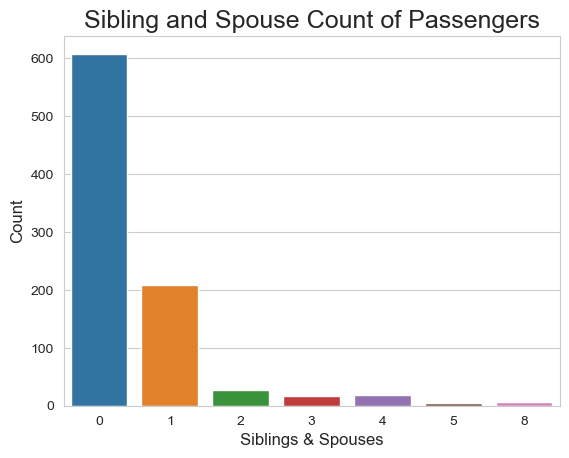

In [9]:
sns.countplot(x='SibSp',data=train)
plt.title('Sibling and Spouse Count of Passengers', fontsize = 18)
plt.xlabel('Siblings & Spouses', fontsize = 12)
plt.ylabel('Count',fontsize = 12)
plt.show()

**Majority of the passengers did not have siblings or spouses, and most of those who did only had one.**

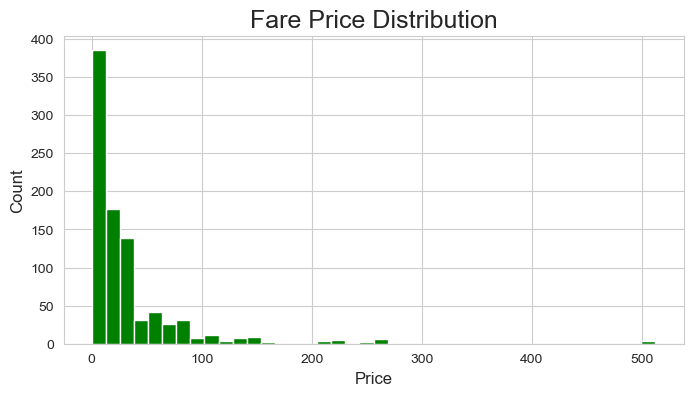

In [10]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.title('Fare Price Distribution', fontsize = 18)
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Count',fontsize = 12)
plt.show()

**The majority of the passengers purchased the cheapest boarding passes.**

___
## Data Cleaning:

**I will make all missing age values equal to the mean of the boarding class for [ i ] passenger.**


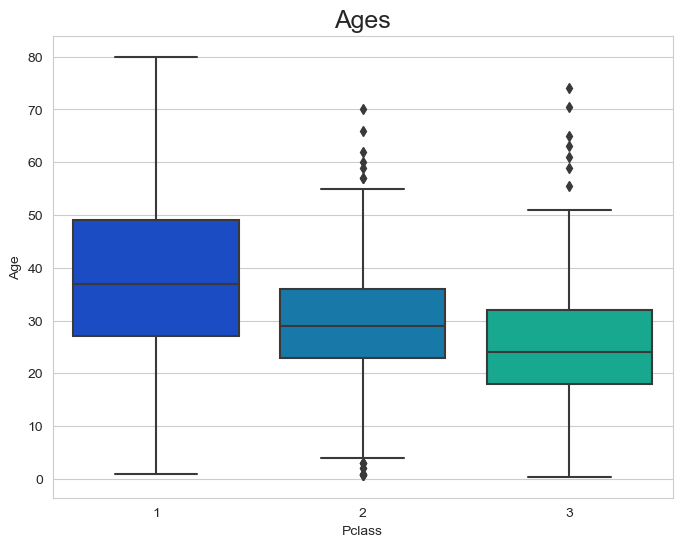

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

plt.title('Ages', fontsize = 18)
plt.show()

**Algorithm for imputing the ages:**

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        elif Pclass == 3:
            return 24

    else:
        return Age

In [13]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [14]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Doubling checking the age and cabin data:**

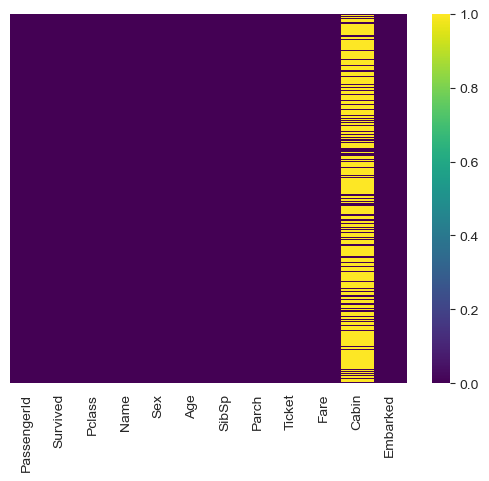

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')
plt.show()

**There is no more missing data in the ages, and I will drop the cabin column.**

In [16]:
train.drop('Cabin',axis=1,inplace=True)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
train.dropna(inplace=True) # getting rid of any remaining rows that are missing data.

## Converting Data Into Categorical Features 

**Turning any categorical feature into dummy variables** This is necessary for many machine learning techniquessuch as logistic regression, KNN, and many others.

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [20]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [21]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [22]:
train = pd.concat([train,sex,embark],axis=1)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
train.drop('PassengerId', axis = 1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Building The Logistic Regression model:

**First step is to separate the data into training and test data:**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = train.drop('Survived',axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=300)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [29]:
predictions = logmodel.predict(X_test)

## Model Evaluation:

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[150  13]
 [ 32  72]]


**The model can predict passenger survival with about 83% accuracy.**